In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
startups = pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
startups.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [7]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<Axes: >

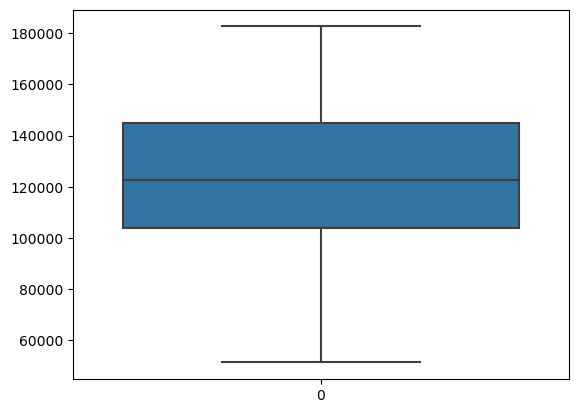

In [10]:
import seaborn as sns
sns.boxplot(startups["Administration"])

In [11]:
x = startups.iloc[:,0:4].values
y = startups.iloc[:,4:5].values

## Handling catagorical data

In [13]:
x[0]

array([165349.2, 136897.8, 471784.1, 'New York'], dtype=object)

In [14]:
startups["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [15]:
x.shape

(50, 4)

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [21]:
ct = ColumnTransformer([("oh", OneHotEncoder(), [3])],remainder="passthrough")

In [22]:
x = ct.fit_transform(x)
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [23]:
x.shape

(50, 6)

In [24]:
import joblib

In [25]:
joblib.dump(ct, "column")

['column']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state= 0)

In [31]:
from sklearn.linear_model import LinearRegression
multilinear = LinearRegression()
multilinear.fit(x_train,y_train)

LinearRegression()

In [32]:
y_prend = multilinear.predict(x_test)

In [33]:
y_prend

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230166],
       [ 67851.69209676],
       [ 98791.73374686],
       [113969.43533013],
       [167921.06569551]])

In [35]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_prend)

In [36]:
accuracy

0.9347068473282303

In [37]:
yp = multilinear.predict([[1, 0, 0, 12345, 1234, 3455]])

In [38]:
yp

array([[52269.68734473]])

In [39]:
new = joblib.load("column")